# **Two-way ANOVA test using balanced designs**

Two-way ANOVA test is used to evaluate simultaneously the effect of two grouping variables (A and B) on a response variable.

- The balanced design occurs when the sample sizes within cells are equal.

Two-way ANOVA test can be used in this situation.

In [1]:
install.packages(c("dplyr", "ggplot2", "datasets", "ggpubr"))
library(dplyr)
library(ggplot2)
library(datasets)
library(ggpubr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




We’ll use the built-in R data set `ToothGrowth`.

It includes information
from a study on the effects of vitamin C on tooth growth in Guinea pigs.
- The trial used 60 pigs who were given
- one of three vitamin C dose levels (`0.5, 1, or 2` mg/day)
- via one of two administration routes (orange juice or ascorbic acid as `OJ`) (a form of vitamin C and coded as `VC`)

In [34]:
data = ToothGrowth

# **EDA**

In [35]:
#A sample of the data is presented below,
# which includes tooth length measurements
set.seed(123)
dplyr::sample_n(data, 5)

len,supp,dose
<dbl>,<fct>,<dbl>
15.2,OJ,0.5
22.5,VC,1.0
25.5,OJ,2.0
17.3,VC,1.0
7.3,VC,0.5


In [36]:
# Checking the structure
str(data)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


R treats “dose” as a numeric variable based on the output.
- So we’ll
transform it to a factor variable then recode the levels after converting the dose to a factor.

In [37]:
data$dose = factor(data$dose,
                    levels = c(0.5, 1, 2),
                    labels = c("D0.5", "D1", "D2"))
str(data)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: Factor w/ 3 levels "D0.5","D1","D2": 1 1 1 1 1 1 1 1 1 1 ...


### Question:
Does tooth length vary according to on supp and dose?

In [38]:
# making frequency table:
table(data$supp, data$dose)

    
     D0.5 D1 D2
  OJ   10 10 10
  VC   10 10 10

- We have 2 X 3 design cells, each with 10 individuals and the factors supp and dose.

- We have a well-balanced design here.

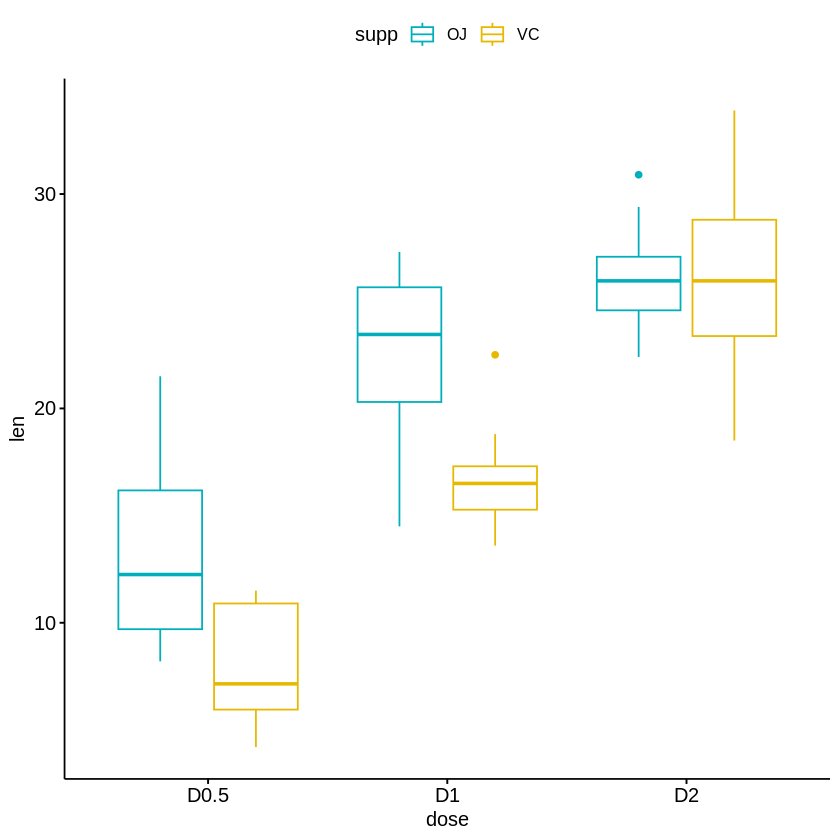

In [39]:
# Visualizng the data
ggboxplot(data, x = "dose", y = "len", color = "supp",
          palette = c("#00AFBB", "#E7B800"))

# **Two-way interaction plot**
- which plots the mean (or other summary) of the response for two-way combinations of factors, thereby illustrating possible interactions

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


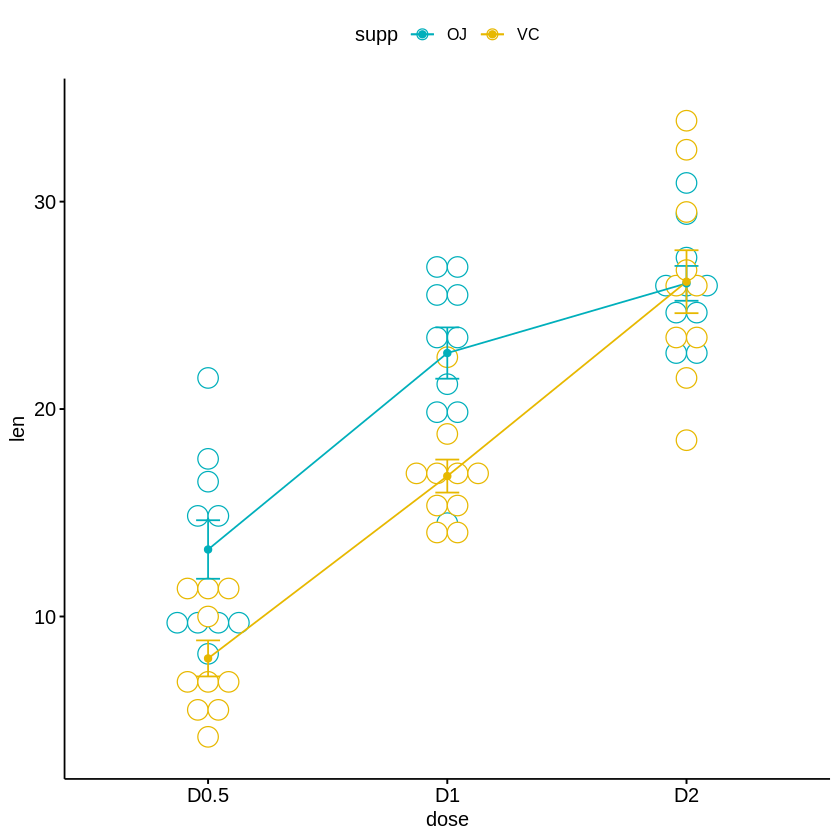

In [40]:
ggline(data, x = "dose", y = "len", color = "supp",
       add = c("mean_se", "dotplot"),
       palette = c("#00AFBB", "#E7B800"))

- There is no difference in the means of factor A
- There is no difference in means of factor B
- There is no interaction between factors A and B

In [43]:
#The R function aov() can be used
res.aov2 <- aov(len ~ supp + dose, data = data)
summary(res.aov2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4   14.02 0.000429 ***
dose         2 2426.4  1213.2   82.81  < 2e-16 ***
Residuals   56  820.4    14.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

From the above ANOVA table we can see that both supp and dose are statistically significant.

- Modifying the delivery technique (supp) or the vitamin C dose will have a major impact on the mean tooth length.

The above-fitted model is used when the two-factor variables are unrelated

- Let's replace the plus symbol (+) with an asterisk (*) if we think these two variables will interact:

In [41]:
res.aov3 = aov(len ~ supp * dose, data = data)
summary(res.aov3)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

It can be seen that the two main effects (supp and dose) as well as their interactionare statistically significant.

----

#**Multiple pairwise**-comparison between the means of groups

In [44]:
#We can compute Tukey HSD
TukeyHSD(res.aov3, which = "dose")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = len ~ supp * dose, data = data)

$dose
          diff       lwr       upr   p adj
D1-D0.5  9.130  6.362488 11.897512 0.0e+00
D2-D0.5 15.495 12.727488 18.262512 0.0e+00
D2-D1    6.365  3.597488  9.132512 2.7e-06


Checking the homogeneity of variance assumption
# 1. Homogeneity of variances

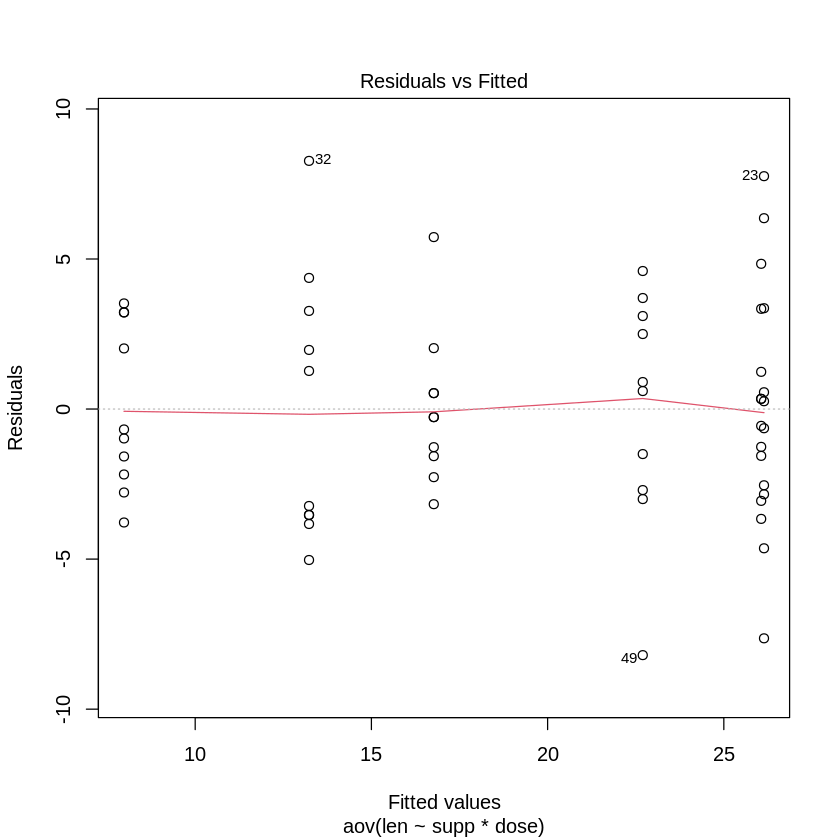

In [45]:
plot(res.aov3, 1)

In [47]:
#Levene’s test to check the homogeneity of variances
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
leveneTest(len ~ supp*dose, data = data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,1.708578,0.1483606
,54,NA,NA


Here, the `p-value` is not less than the significance level of `0.05` therefore, we can assume the homogeneity of variances in the different treatment groups.

------

Check the normality assumpttion
# 2. **Normality**

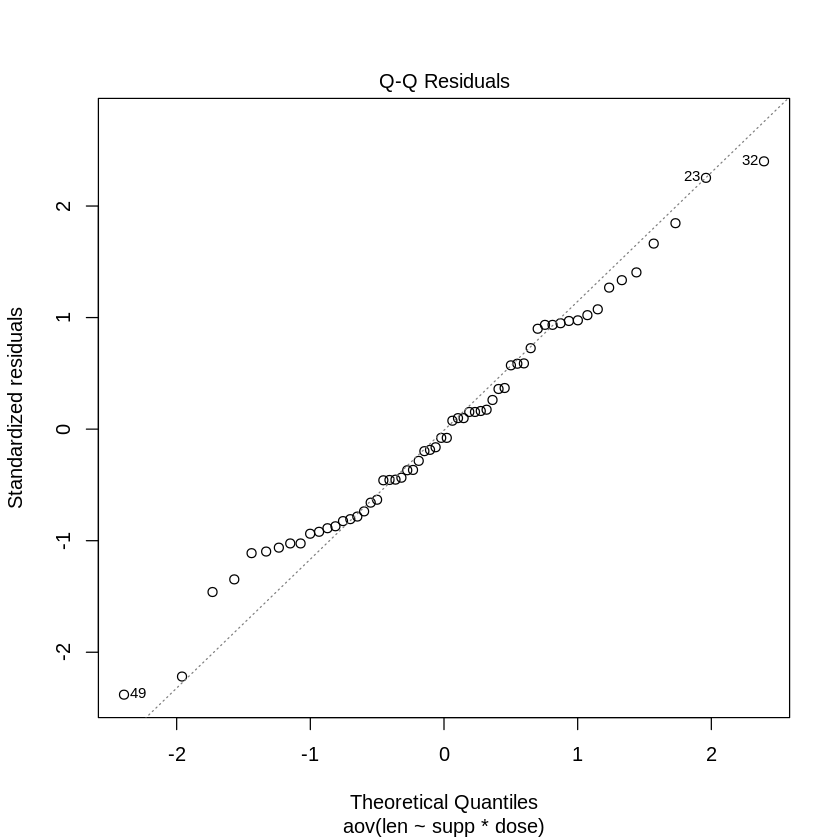

In [49]:
plot(res.aov3, 2)

As all the points fall approximately along this reference line, we can assume normality.

In [50]:
# Extracting the residuals
aov_residuals <- residuals(object = res.aov3)
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.98499, p-value = 0.6694


The conclusion above, is also supported by the Shapiro-Wilk test on the ANOVA residuals (W = 0.98, p = 0.5) which finds no indication that normality is violated.